In [1]:
from google.colab import files
uploaded = files.upload()

Saving RUL_FD001.txt to RUL_FD001.txt
Saving RUL_FD002.txt to RUL_FD002.txt
Saving RUL_FD003.txt to RUL_FD003.txt
Saving RUL_FD004.txt to RUL_FD004.txt
Saving test_FD001.txt to test_FD001.txt
Saving test_FD002.txt to test_FD002.txt
Saving test_FD003.txt to test_FD003.txt
Saving test_FD004.txt to test_FD004.txt
Saving train_FD001.txt to train_FD001.txt
Saving train_FD002.txt to train_FD002.txt
Saving train_FD003.txt to train_FD003.txt
Saving train_FD004.txt to train_FD004.txt


In [2]:
import pandas as pd

# Define columns
cols = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + \
       [f'sensor{i}' for i in range(1, 22)]

# Helper to load and clean CMAPSS files
def load_and_clean(file_path):
    df = pd.read_csv(file_path, sep='\s+', header=None)
    df.columns = cols
    return df

# Load training datasets
train_1 = load_and_clean("train_FD001.txt")
train_2 = load_and_clean("train_FD002.txt")
train_3 = load_and_clean("train_FD003.txt")
train_4 = load_and_clean("train_FD004.txt")

# Load testing datasets
test_1 = load_and_clean("test_FD001.txt")
test_2 = load_and_clean("test_FD002.txt")
test_3 = load_and_clean("test_FD003.txt")
test_4 = load_and_clean("test_FD004.txt")

# Load RUL files (single-column)
rul_1 = pd.read_csv("RUL_FD001.txt", header=None)
rul_2 = pd.read_csv("RUL_FD002.txt", header=None)
rul_3 = pd.read_csv("RUL_FD003.txt", header=None)
rul_4 = pd.read_csv("RUL_FD004.txt", header=None)


In [3]:
cols = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + \
       [f'sensor{i}' for i in range(1, 22)]


In [4]:
import pandas as pd

def load_and_tag_train(file_path, dataset_tag):
    df = pd.read_csv(file_path, sep='\\s+', header=None)
    df.columns = cols
    df["dataset"] = dataset_tag
    return df


In [5]:
train_1 = load_and_tag_train("train_FD001.txt", "FD001")
train_2 = load_and_tag_train("train_FD002.txt", "FD002")
train_3 = load_and_tag_train("train_FD003.txt", "FD003")
train_4 = load_and_tag_train("train_FD004.txt", "FD004")


In [6]:
train_all = pd.concat([train_1, train_2, train_3, train_4], axis=0).reset_index(drop=True)


In [7]:
def load_and_tag_test(file_path, dataset_tag):
    df = pd.read_csv(file_path, sep='\\s+', header=None)
    df.columns = cols
    df["dataset"] = dataset_tag
    return df

test_1 = load_and_tag_test("test_FD001.txt", "FD001")
test_2 = load_and_tag_test("test_FD002.txt", "FD002")
test_3 = load_and_tag_test("test_FD003.txt", "FD003")
test_4 = load_and_tag_test("test_FD004.txt", "FD004")


In [8]:
rul_1 = pd.read_csv("RUL_FD001.txt", header=None)
rul_2 = pd.read_csv("RUL_FD002.txt", header=None)
rul_3 = pd.read_csv("RUL_FD003.txt", header=None)
rul_4 = pd.read_csv("RUL_FD004.txt", header=None)


In [9]:
print(train_all.head())
print(train_all["dataset"].value_counts())
print(test_1.head())


   id  cycle  setting1  setting2  setting3  sensor1  sensor2  sensor3  \
0   1      1   -0.0007   -0.0004     100.0   518.67   641.82  1589.70   
1   1      2    0.0019   -0.0003     100.0   518.67   642.15  1591.82   
2   1      3   -0.0043    0.0003     100.0   518.67   642.35  1587.99   
3   1      4    0.0007    0.0000     100.0   518.67   642.35  1582.79   
4   1      5   -0.0019   -0.0002     100.0   518.67   642.37  1582.85   

   sensor4  sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
0  1400.60    14.62  ...   2388.02   8138.62    8.4195      0.03       392   
1  1403.14    14.62  ...   2388.07   8131.49    8.4318      0.03       392   
2  1404.20    14.62  ...   2388.03   8133.23    8.4178      0.03       390   
3  1401.87    14.62  ...   2388.08   8133.83    8.3682      0.03       392   
4  1406.22    14.62  ...   2388.04   8133.80    8.4294      0.03       393   

   sensor18  sensor19  sensor20  sensor21  dataset  
0      2388     100.0     39.06   23.41

# Add RUL (Remaining Useful Life) Column to Training Data

In [10]:
def add_rul_column(df):
    # Get max cycle for each engine ID
    rul_df = df.groupby('id')['cycle'].max().reset_index()
    rul_df.columns = ['id', 'max_cycle']

    # Merge back into the original dataframe
    df = df.merge(rul_df, on='id')

    # Compute Remaining Useful Life
    df['RUL'] = df['max_cycle'] - df['cycle']

    # Drop helper column
    df.drop('max_cycle', axis=1, inplace=True)

    return df


In [11]:
train_1 = add_rul_column(train_1)
train_2 = add_rul_column(train_2)
train_3 = add_rul_column(train_3)
train_4 = add_rul_column(train_4)


In [12]:
train_all = add_rul_column(train_all)


In [13]:
train_1[['id', 'cycle', 'RUL']].head()


,id,cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [14]:
train_all[['dataset', 'id', 'cycle', 'RUL']].sample(5)

,dataset,id,cycle,RUL
94688,FD003,82,173,112
143859,FD004,180,171,173
28206,FD002,38,170,31
103686,FD004,18,72,375
24899,FD002,22,175,36


In [15]:
train_all['dataset'].value_counts()


,count
dataset,
FD004,61249
FD002,53759
FD003,24720
FD001,20631


In [ ]:
def get_useful_features(df, target_col='RUL', variance_thresh=1e-5, corr_thresh=0.02):
    feature_cols = [col for col in df.columns if col.startswith('setting') or col.startswith('sensor')]

    # Step 1: Variance filter
    var_series = df[feature_cols].var()
    high_var_features = var_series[var_series > variance_thresh].index.tolist()

    # Step 2: Correlation filter with RUL
    corr_series = df[high_var_features + [target_col]].corr()[target_col].drop(target_col)
    useful = corr_series[abs(corr_series) > corr_thresh].index.tolist()

    
    for setting in ['setting1', 'setting2', 'setting3']:
        if setting not in useful:
            useful.append(setting)

    return useful

# Compute useful features from each dataset
feature_sets = {
    'FD001': set(get_useful_features(train_1)),
    'FD002': set(get_useful_features(train_2)),
    'FD003': set(get_useful_features(train_3)),
    'FD004': set(get_useful_features(train_4)),
}


union_useful_features = sorted(list(set.union(*feature_sets.values())))
useful_features = union_useful_features

#
if "cycle_ratio" not in useful_features:
    useful_features.append("cycle_ratio")


print("✅ Final useful features:")
print(useful_features)


✅ Final useful features:
['sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor2', 'sensor20', 'sensor21', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'setting1', 'setting2', 'setting3', 'cycle_ratio']


In [ ]:
import json

# Save the feature list to a JSON file
with open("feature_order.json", "w") as f:
    json.dump(useful_features, f)

print("Saved feature order to feature_order.json")


✅ Saved feature order to feature_order.json


In [18]:
from google.colab import files
files.download("feature_order.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
from sklearn.preprocessing import StandardScaler

scalers = {}
normalized_dfs = []

for dset in train_all['dataset'].unique():
    subset = train_all[train_all['dataset'] == dset].copy()


    max_cycle = subset.groupby('id')['cycle'].transform('max')
    subset['cycle_ratio'] = subset['cycle'] / max_cycle

    scaler = StandardScaler()
    subset[useful_features] = scaler.fit_transform(subset[useful_features])

    scalers[dset] = scaler
    normalized_dfs.append(subset)

In [46]:
train_all_normalized = pd.concat(normalized_dfs).reset_index(drop=True)

# Linear Regression(Baseline Model)

 Preparing Input and Target

In [47]:
from sklearn.model_selection import train_test_split

# Features and target
X = train_all_normalized[useful_features]
y = train_all_normalized['RUL']

# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

 Predict and Evaluate

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lr = lr_model.predict(X_val)

mae_lr = mean_absolute_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))  
r2_lr = r2_score(y_val, y_pred_lr)

print("🔹 Linear Regression Results")
print(f"MAE  = {mae_lr:.2f}")
print(f"RMSE = {rmse_lr:.2f}")
print(f"R²   = {r2_lr:.2f}")


🔹 Linear Regression Results
MAE  = 49.11
RMSE = 64.02
R²   = 0.55


<ipython-input-50-b8afea3857ed>:20: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


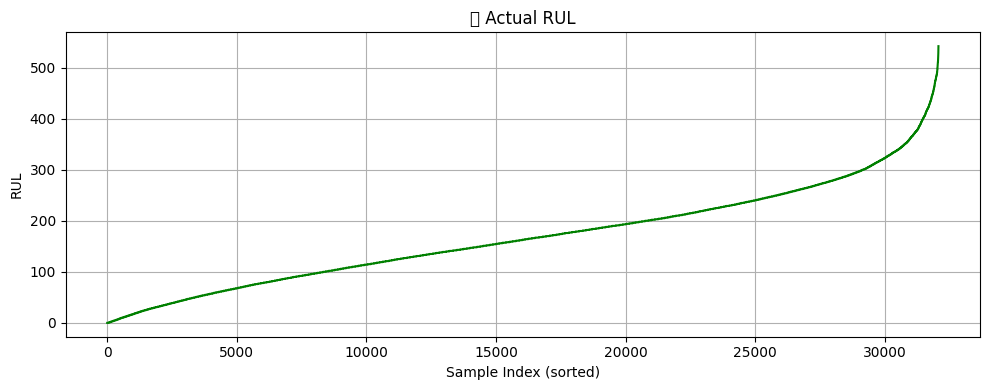

<ipython-input-50-b8afea3857ed>:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


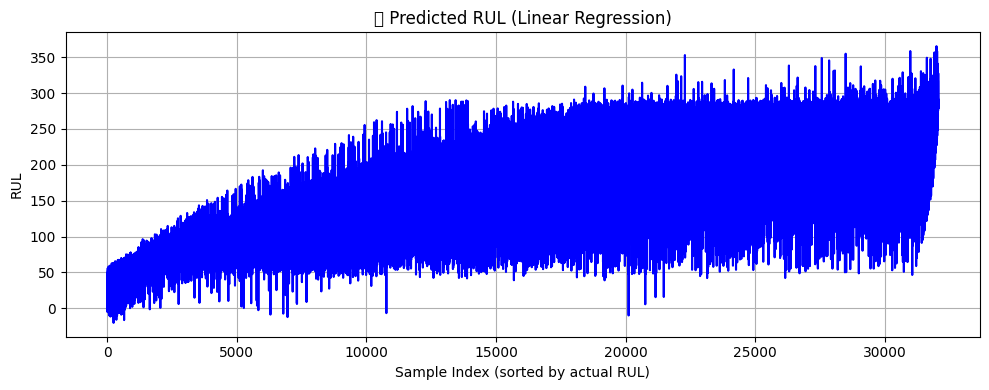

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


y_val = np.array(y_val)
y_pred_lr = np.array(y_pred_lr)


sorted_indices = np.argsort(y_val)
sorted_actual = y_val[sorted_indices]
sorted_pred = y_pred_lr[sorted_indices]


plt.figure(figsize=(10, 4))
plt.plot(sorted_actual, label='Actual RUL', color='green')
plt.xlabel("Sample Index (sorted)")
plt.ylabel("RUL")
plt.title("Actual RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 4))
plt.plot(sorted_pred, label='Predicted RUL (Linear Regression)', color='blue')
plt.xlabel("Sample Index (sorted by actual RUL)")
plt.ylabel("RUL")
plt.title("Predicted RUL (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


# LSTM

Creating Sequences From train_all_normalized

In [51]:
import numpy as np

def create_lstm_sequences(df, features, window_size=50):
    X = []
    y = []

    for eng_id in df['id'].unique():
        engine_df = df[df['id'] == eng_id].reset_index(drop=True)
        engine_data = engine_df[features].values
        engine_rul = engine_df['RUL'].values

        for i in range(len(engine_df) - window_size):
            X.append(engine_data[i:i+window_size])
            y.append(engine_rul[i + window_size])

    return np.array(X), np.array(y)


In [52]:
window_size=50

X_lstm, y_lstm = create_lstm_sequences(train_all_normalized, useful_features, window_size=window_size)
print(f"X shape: {X_lstm.shape}, y shape: {y_lstm.shape}")


X shape: (147359, 50, 21), y shape: (147359,)


Train/Validation Split

In [53]:
from sklearn.model_selection import train_test_split

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42
)



Define & Compile LSTM Model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(window_size, len(useful_features))),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the LSTM Model

In [56]:
model_lstm.compile(optimizer='adam', loss='mae')

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_val_lstm, y_val_lstm),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 319s 171ms/step - loss: 129.7847 - val_loss: 84.5240
Epoch 2/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 319s 169ms/step - loss: 80.7736 - val_loss: 75.4573
Epoch 3/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 321s 169ms/step - loss: 69.3014 - val_loss: 48.0423
Epoch 4/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 323s 170ms/step - loss: 48.3832 - val_loss: 43.6252
Epoch 5/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 321s 169ms/step - loss: 44.8028 - val_loss: 43.0837
Epoch 6/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 311s 169ms/step - loss: 42.7733 - val_loss: 39.2133
Epoch 7/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 325s 170ms/step - loss: 41.0432 - val_loss: 37.4197
Epoch 8/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 320s 169ms/step - loss: 39.5558 - val_loss: 35.9655
Epoch 9/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 322s 169ms/step - loss: 37.8462 - val_loss: 34.8452
Epoch 10/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 311s 169ms/step - loss: 36.4215 - val_loss: 33.5176
Epoch 11/100
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 321s

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_lstm = model_lstm.predict(X_val_lstm).flatten()

mae_lstm = mean_absolute_error(y_val_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_val_lstm, y_pred_lstm))
r2_lstm = r2_score(y_val_lstm, y_pred_lstm)

print("🔹 LSTM Results")
print(f"MAE  = {mae_lstm:.2f}")
print(f"RMSE = {rmse_lstm:.2f}")
print(f"R²   = {r2_lstm:.2f}")


921/921 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step
🔹 LSTM Results
MAE  = 6.92
RMSE = 17.41
R²   = 0.97


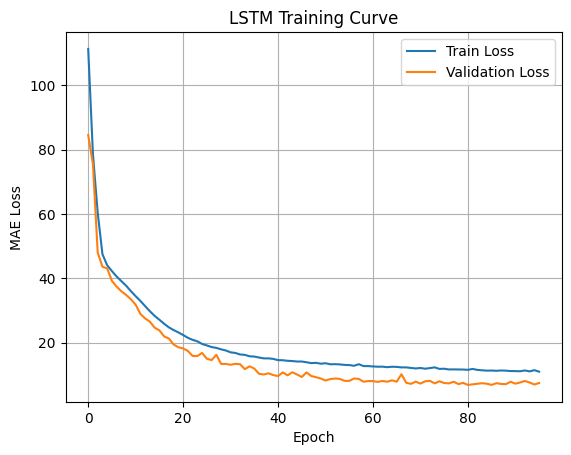

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training Curve")
plt.xlabel("Epoch")
plt.ylabel("MAE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd


mae_lr = 49.11
rmse_lr = 64.02
r2_lr = 0.55

mae_lstm = 6.92
rmse_lstm = 17.41
r2_lstm = 0.97


results = {
    "Model": ["Linear Regression", "LSTM"],
    "MAE": [mae_lr, mae_lstm],
    "RMSE": [rmse_lr, rmse_lstm],
    "R²": [r2_lr, r2_lstm]
}


comparison_df = pd.DataFrame(results)


print("Model Comparison:")
print(comparison_df)


Model Comparison:
               Model    MAE   RMSE    R²
0  Linear Regression  49.11  64.02  0.55
1               LSTM   6.92  17.41  0.97


# Evaluate LSTM

In [61]:
# Load and clean test data
cols = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1, 22)]
test_df = pd.read_csv("test_FD001.txt", sep='\s+', header=None)
test_df.columns = cols

# Load corresponding RUL
rul_df = pd.read_csv("RUL_FD001.txt", header=None)
rul_df.columns = ['RUL']


# Add RUL to Each Test Row

In [62]:
def add_test_rul(test_df, rul_df):
    max_cycle_df = test_df.groupby('id')['cycle'].max().reset_index()
    max_cycle_df.columns = ['id', 'max_cycle']
    max_cycle_df['true_rul'] = rul_df['RUL']

    test_df = test_df.merge(max_cycle_df, on='id')
    test_df['RUL'] = test_df['true_rul'] + (test_df['max_cycle'] - test_df['cycle'])

    return test_df.drop(columns=['max_cycle', 'true_rul'])

test_df = add_test_rul(test_df, rul_df)


 Normalize Using FD001

In [ ]:

max_cycle = test_df.groupby('id')['cycle'].transform('max')
test_df['cycle_ratio'] = test_df['cycle'] / max_cycle


In [64]:
from sklearn.preprocessing import StandardScaler
import joblib


scaler_fd001 = scalers['FD001']

test_df[useful_features] = scaler_fd001.transform(test_df[useful_features])


Predict RUL per Engine Using LSTM

In [ ]:
def predict_test_engine_rul(engine_id, test_df, model, features, window_size=30):
    engine_data = test_df[test_df['id'] == engine_id]
    if len(engine_data) < window_size:
        return None  

    last_seq = engine_data[-window_size:][features].values
    last_seq = last_seq.reshape(1, window_size, len(features))
    prediction = model.predict(last_seq, verbose=0)
    return float(prediction[0][0])


In [ ]:
predicted_ruls = []
actual_ruls = rul_df['RUL'].values.flatten()

for eng_id in test_df['id'].unique():
    pred = predict_test_engine_rul(eng_id, test_df, model_lstm, useful_features)
    predicted_ruls.append(pred)


filtered_preds = [p for p in predicted_ruls if p is not None]
filtered_actuals = actual_ruls[:len(filtered_preds)]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_test = mean_absolute_error(filtered_actuals, filtered_preds)
rmse_test = mean_squared_error(filtered_actuals, filtered_preds) ** 0.5

print("Test Evaluation (FD001):")
print(f"MAE  = {mae_test:.2f}")
print(f"RMSE = {rmse_test:.2f}")


📉 Test Evaluation (FD001):
MAE  = 38.23
RMSE = 48.67


In [ ]:
def evaluate_test_fd(test_file, rul_file, scaler, model, features, window_size=30):
    # Load and clean test set
    test_df = pd.read_csv(test_file, sep='\s+', header=None)
    test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1, 22)]

    # Load RULs
    rul_df = pd.read_csv(rul_file, header=None)
    rul_df.columns = ['RUL']

    # Add calculated RUL to test set
    max_cycle_df = test_df.groupby('id')['cycle'].max().reset_index()
    max_cycle_df.columns = ['id', 'max_cycle']
    max_cycle_df['true_rul'] = rul_df['RUL']
    test_df = test_df.merge(max_cycle_df, on='id')
    test_df['RUL'] = test_df['true_rul'] + (test_df['max_cycle'] - test_df['cycle'])
    test_df.drop(columns=['max_cycle', 'true_rul'], inplace=True)

    
    max_cycle = test_df.groupby('id')['cycle'].transform('max')
    test_df['cycle_ratio'] = test_df['cycle'] / max_cycle

    # Normalize
    test_df[features] = scaler.transform(test_df[features])

    # Predict for each engine
    predicted_ruls = []
    for eng_id in test_df['id'].unique():
        engine_data = test_df[test_df['id'] == eng_id]
        if len(engine_data) < window_size:
            continue
        last_seq = engine_data[-window_size:][features].values
        last_seq = last_seq.reshape(1, window_size, len(features))
        pred = model.predict(last_seq, verbose=0)
        predicted_ruls.append(pred[0][0])

    actual_ruls = rul_df['RUL'].values[:len(predicted_ruls)]
    mae = mean_absolute_error(actual_ruls, predicted_ruls)
    rmse = np.sqrt(mean_squared_error(actual_ruls, predicted_ruls))

    return mae, rmse


In [73]:
results = []

datasets = ['FD001', 'FD002', 'FD003', 'FD004']
test_files = ['test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt']
rul_files = ['RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt']

for tag, test_file, rul_file in zip(datasets, test_files, rul_files):
    mae, rmse = evaluate_test_fd(test_file, rul_file, scalers[tag], model_lstm, useful_features)
    results.append({'Dataset': tag, 'MAE': mae, 'RMSE': rmse})

eval_df = pd.DataFrame(results)
print(eval_df)


  Dataset        MAE       RMSE
0   FD001  38.226697  48.671395
1   FD002  57.459396  72.328597
2   FD003  30.132533  38.357233
3   FD004  61.410453  75.419157


<ipython-input-74-c4af56e8d7a8>:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


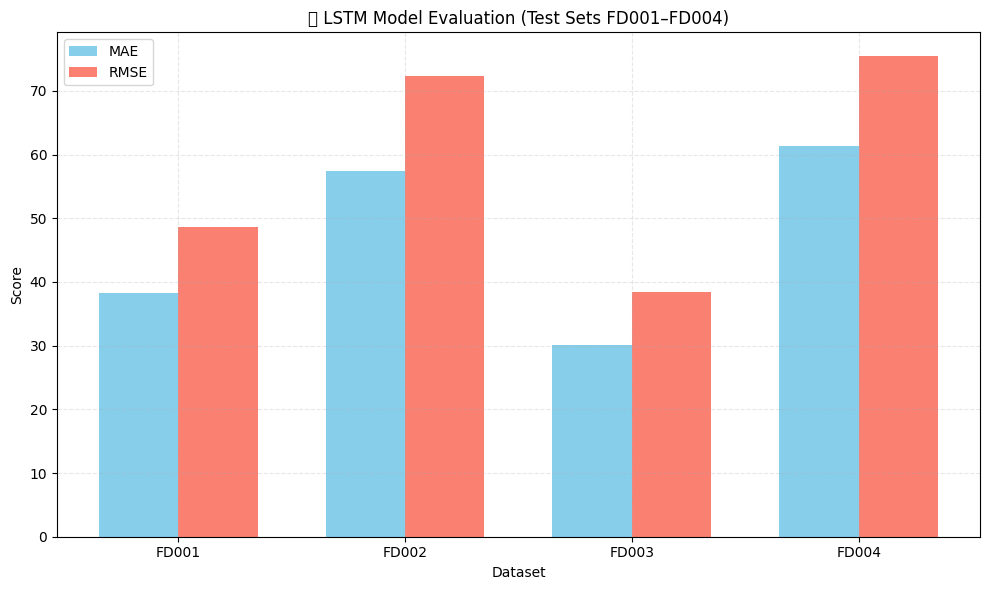

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated evaluation results
eval_df = pd.DataFrame({
    "Dataset": ["FD001", "FD002", "FD003", "FD004"],
    "MAE": [38.23, 57.46, 30.13, 61.41],
    "RMSE": [48.67, 72.33, 38.36, 75.42]
})

# Plot setup
plt.figure(figsize=(10, 6))
x = range(len(eval_df))
bar_width = 0.35

# Bars
plt.bar(x, eval_df['MAE'], width=bar_width, label='MAE', color='skyblue')
plt.bar([i + bar_width for i in x], eval_df['RMSE'], width=bar_width, label='RMSE', color='salmon')

# Labels & Style
plt.xlabel("Dataset")
plt.ylabel("Score")
plt.title("LSTM Model Evaluation (Test Sets FD001–FD004)")
plt.xticks([i + bar_width/2 for i in x], eval_df['Dataset'])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


In [75]:
# Save model and scaler
model_lstm.save("lstm_rul_model.h5")

import joblib
joblib.dump(scaler, "rul_scaler.pkl")


['rul_scaler.pkl']

In [76]:
from google.colab import files
files.download("lstm_rul_model.h5")
files.download("rul_scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>